$$h(z) = b + c \cos(2\pi z) + s \sin(2\pi z) \;.$$
$$T = \{(z_1, y_1), (z_2, y_2), (z_3, y_3), (z_4, y_4) \}$$
$$=\{ (0, -2), (1/4, 0), (1/2, 2), (3/4, 0) \}\;.$$

In [3]:
### Julia used here. Approved by Professor.
T = [(0, -2), (1/4, 0), (1/2, 2), (3/4, 0)]

b = 0
c, s = -2, 0
xs = [[round(cos(2π*z)) round(sin(2π*z))] for (z,y) in T]
x1 = [1 0]
x2 = [0 1]
x3 = [-1 0]
x4 = [0 -1]

w = [c s]
v = [b c s]

A = [ 1 1 0 ; 1 0 1 ; 1 -1 0 ; 1 0 -1 ]
y = [ -2, 0, 2, 0 ]

ATA = [ 4 0 0 ; 0 2 0 ; 0 0 2 ]
ATy = [ 0, -4, 0 ]

# println(xs)
# println(w)
# println(v)

# println(A)
# println(y)

# println(ATA)
# println(A'A)
# println(ATy)
# println(A'*y)

A'A

# v = [0, -2, 0]
# b = 0, c = -2, s = 0
v = [b, c, s]

println(v)
println(A'A\A'y)

h(z) = -2cos(2π*z)

SyntaxError: unterminated string literal (detected at line 33) (1241265965.py, line 33)

In [ ]:
using Plots

In [ ]:
z = 0:0.01:1
y = map(h, z)
plot(z, y, xlabel="z", ylabel="y", label="h(z)")
scatter!(first.(T), last.(T), label="T")

SyntaxError: invalid syntax (1979406454.py, line 1)

$$Av=y$$

In [ ]:
help(np.zeros)

Help on built-in function zeros in module numpy:

zeros(...)
    zeros(shape, dtype=float, order='C', *, like=None)

    Return a new array of given shape and type, filled with zeros.

    Parameters
    ----------
    shape : int or tuple of ints
        Shape of the new array, e.g., ``(2, 3)`` or ``2``.
    dtype : data-type, optional
        The desired data-type for the array, e.g., `numpy.int8`.  Default is
        `numpy.float64`.
    order : {'C', 'F'}, optional, default: 'C'
        Whether to store multi-dimensional data in row-major
        (C-style) or column-major (Fortran-style) order in
        memory.
    like : array_like, optional
        Reference object to allow the creation of arrays which are not
        NumPy arrays. If an array-like passed in as ``like`` supports
        the ``__array_function__`` protocol, the result will be defined
        by it. In this case, it ensures the creation of an array object
        compatible with that passed in via this argument.



In [4]:
import numpy as np
import math

def a_matrix(z,m):
    n = len(z)
    xs = []
    for i in range(n):
        x = np.zeros(2*m+1)
        x[0] = 1
        for j in range(1,m+1):
            x[j] = round(math.cos(2*math.pi*j*z[i]),3)
        for j in range(1,m+1):
            x[j+m] = round(math.sin(2*math.pi*j*z[i]),3)
        xs.append(x)

    A = np.stack(xs)
    return A

def a_matrix_vectorized(z,m):
    z = np.asarray(z)
    n = len(z)

    j = np.arange(1,m+1)
    Z, J = np.meshgrid(z,j, indexing='ij')

    coses = np.round(np.cos(2*np.pi*Z*J),3)
    sines = np.round(np.sin(2*np.pi*Z*J),3)

    A = np.concatenate((np.ones((n,1)),coses, sines), axis=1)
    return A

T = np.array([(0, -2), (1/4, 0), (1/2, 2), (3/4, 0)])
z,y = T[:, 0], T[:, 1]
A = a_matrix(z, 1)
A2 = a_matrix_vectorized(z, 1)
print("DEVECTORIZED\n", A)
print("VECTORIZED\n", A2)

DEVECTORIZED
 [[ 1.  1.  0.]
 [ 1.  0.  1.]
 [ 1. -1.  0.]
 [ 1. -0. -1.]]
VECTORIZED
 [[ 1.  1.  0.]
 [ 1.  0.  1.]
 [ 1. -1.  0.]
 [ 1. -0. -1.]]


In [5]:
T = np.array([(0, -2), (1/4, 0), (1/2, 2), (3/4, 0)])
z,y = T[:, 0], T[:, 1]

def fit_h(z, y, m):
    A = a_matrix(z, m)
    v = np.round(np.linalg.lstsq(A, y)[0],3)
    b, c, s = v[0], v[1:m+1], v[m+1:2*m+1]
    return b, c, s

b,c,s = fit_h(z, y, 1)
print("B",b)
print("C",c)
print("S",s)

B -0.0
C [-2.]
S [-0.]


In [6]:
import urllib.request
import ssl
from os import path as osp
import shutil
import pickle

In [7]:
def retrieve(file_name, semester='fall25', homework=2):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        context = ssl._create_unverified_context()
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci371/homework/{}/{}'
        url = fmt.format(semester, homework, file_name)
        with urllib.request.urlopen(url, context=context) as response:
            with open(file_name, 'wb') as file:
                shutil.copyfileobj(response, file)
        print('Downloaded file {}'.format(file_name))

In [8]:
file_name = 'large_T.pickle'
retrieve(file_name)
with open(file_name, "rb") as file:
    large_T = pickle.load(file)
large_T

Using previously downloaded file large_T.pickle


{'z': array([0.08564917, 0.23681051, 0.80127447, 0.58216204, 0.09412864,
        0.43312694, 0.4790513 , 0.15973891, 0.73457715, 0.11367202,
        0.39122819, 0.51674018, 0.43062802, 0.58679857, 0.73783779,
        0.95626725, 0.28420116, 0.64854721, 0.696216  , 0.29272075,
        0.00149008, 0.97346027, 0.29840122, 0.313986  , 0.89171107,
        0.58516294, 0.47130967, 0.77327701, 0.03034601, 0.7069651 ]),
 'y': array([-1.08864599, -1.02917202, -0.9117461 ,  2.058035  , -0.99084833,
         2.06701044,  1.71718377, -0.89786932, -1.09596448, -1.16686198,
         2.02764458,  2.07005449,  1.95552325,  1.89235942, -0.99738752,
        -1.00527473, -0.85944018, -0.9252592 , -0.98061844, -0.88883668,
        -1.0205523 , -1.09258996, -0.94159417,  2.05825384, -1.02148289,
         1.92171914,  2.02291539, -1.24938943, -0.93098752, -0.95086317])}

In [9]:
z,y = large_T['z'],large_T['y']

In [10]:
import matplotlib.pyplot as plt

In [59]:
def h(z, b, c, s):
    m = len(c)
    k = np.arange(1,m+1)
    return b + np.dot(c, np.cos(2*np.pi* k * z)) + np.dot(s, np.sin(2*np.pi* k * z))

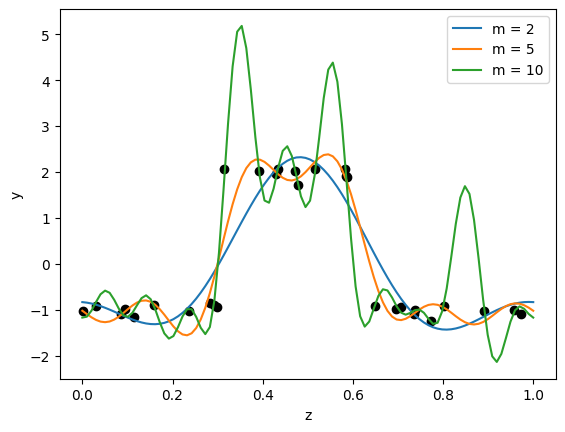

In [61]:
fig, ax = plt.subplots()
ax.scatter(z,y, color="black")

Z = np.linspace(0, 1, 100)
# for m in range(10):
for m in (2,5,10):
    b,c,s = fit_h(z, y, m)
    Y = [h(z,b,c,s) for z in Z]
    ax.plot(Z,Y,label=f"m = {m}")

ax.set_xlabel("z")
ax.set_ylabel("y")
ax.legend()

The functions approximate the points in large_T.

The average loss gets better as m increases.

The ability to generalize gets worse as m increases.

The worse ability to generalize as m increases means that function h is overfit to the training data.

If the goal is to use h(z) to predict values y for new data points z that are not in the training set, then an m that is too high will result in worse predictions for the new data points.

A plot of risk (RMSE) and m is displayed below (for fun!)


m = 0, RMSE=1.40894
m = 2, RMSE=0.54351
m = 4, RMSE=0.47874
m = 6, RMSE=0.37164
m = 8, RMSE=0.26158
m = 10, RMSE=0.1822
m = 12, RMSE=0.05949
m = 14, RMSE=0.00634
m = 16, RMSE=0.00247
m = 18, RMSE=0.00154


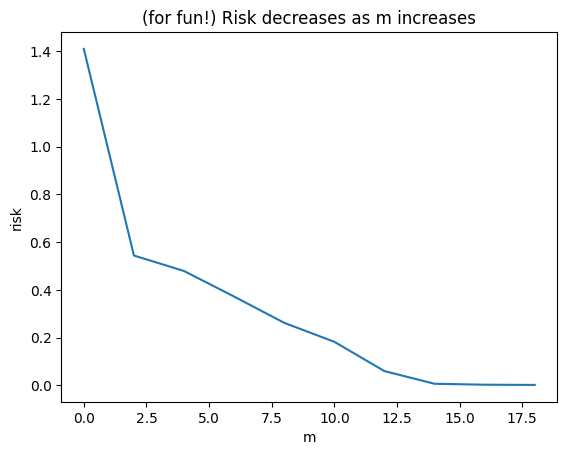

In [ ]:
### THIS IS FOR FUN AND NOT TO BE GRADED!

def RMSE(y_pred, y_true):
    return np.sqrt(np.mean((y_pred - y_true)**2))

M = range(0,20,2)
risks = []

for m in M:
    b,c,s = fit_h(z,y,m)
    y_pred = [h(Z,b,c,s) for Z in z]
    risk = RMSE(y_pred, y)
    risks.append(risk)
    print(f'm = {m}, RMSE={round(risk,5)}')

fig, ax = plt.subplots()
ax.set_xlabel("m")
ax.set_ylabel("risk")
ax.set_title("(for fun!) Risk decreases as m increases")
plt.plot(M, risks)
plt.show()